In [1]:
# Import the necessary libraries for the task.
import torch  # Import PyTorch library for deep learning.
import torch.nn as nn  # Import neural network module from PyTorch.
import matplotlib.pyplot as plt  # Import Matplotlib for plotting.
from IPython import display  # Import IPython display for plot rendering settings.
display.set_matplotlib_formats('svg')  # Set the plot format to SVG.


C:\Users\fafzali\AppData\Local\Temp\ipykernel_28912\3593135673.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')  # Set the plot format to SVG.


In [2]:
# Import the iris dataset using seaborn and store it as 'custom_iris_dataset'.
# Check the first few rows of data.
import seaborn as sns
custom_iris_dataset = sns.load_dataset('iris')
custom_iris_dataset.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
custom_iris_dataset['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# Visualize the iris dataset using pair plots with species as hue.
sns.pairplot(custom_iris_dataset, hue='species')
plt.show()  # Display the plots.


In [4]:
# Convert the iris dataset to a PyTorch tensor ('custom_data').
# Transform species labels to numerical values ('custom_labels').
custom_data = torch.tensor(custom_iris_dataset[custom_iris_dataset.columns[0:4]].values).float()
custom_labels = torch.zeros(len(custom_data), dtype=torch.long)
custom_labels[custom_iris_dataset.species == 'versicolor'] = 1
custom_labels[custom_iris_dataset.species == 'virginica'] = 2
custom_labels


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [5]:
# Define the architecture of the artificial neural network ('custom_ANN_model').
# Specify the loss function ('custom_loss_function') and optimizer ('custom_optimizer').
custom_ANN_model = nn.Sequential(
    nn.Linear(4, 64),   # Input layer with 4 input features and 64 output units.
    nn.ReLU(),          # ReLU activation function.
    nn.Linear(64, 64),  # Hidden layer with 64 output units.
    nn.ReLU(),          # ReLU activation function.
    nn.Linear(64, 3),   # Output layer with 3 classes.
)

custom_loss_function = nn.CrossEntropyLoss()  # Cross-entropy loss for classification.
custom_optimizer = torch.optim.SGD(custom_ANN_model.parameters(), lr=0.01)  # Stochastic Gradient Descent optimizer.


In [6]:
# Set the number of training epochs ('custom_num_epochs').
# Initialize lists for losses ('custom_losses') and ongoing accuracy ('custom_ongoing_accuracy').
custom_num_epochs = 1000
custom_losses = torch.zeros(custom_num_epochs)
custom_ongoing_accuracy = []

# Training loop.
for custom_epoch in range(custom_num_epochs):
    # Forward pass.
    custom_predictions = custom_ANN_model(custom_data)

    # Compute loss.
    custom_loss = custom_loss_function(custom_predictions, custom_labels)
    custom_losses[custom_epoch] = custom_loss

    # Backpropagation.
    custom_optimizer.zero_grad()
    custom_loss.backward()
    custom_optimizer.step()

    # Compute accuracy.
    custom_matches = torch.argmax(custom_predictions, axis=1) == custom_labels
    custom_matches_numeric = custom_matches.float()
    custom_accuracy_pct = 100 * torch.mean(custom_matches_numeric)
    custom_ongoing_accuracy.append(custom_accuracy_pct)

# Final forward pass.
custom_final_predictions = custom_ANN_model(custom_data)
custom_pred_labels = torch.argmax(custom_final_predictions, axis=1)
custom_total_accuracy = 100 * torch.mean((custom_pred_labels == custom_labels).float())


In [7]:
# Extract the class index with the highest probability for each sample.
torch.argmax(custom_predictions, axis=1)


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [8]:
custom_final_predictions

tensor([[  9.9266,   4.6306, -13.6027],
        [  8.9047,   4.2953, -12.3722],
        [  9.1625,   4.2757, -12.5626],
        [  8.5279,   4.1632, -11.8800],
        [  9.9629,   4.6195, -13.6125],
        [ 10.1744,   4.8708, -14.0175],
        [  9.1029,   4.2562, -12.4558],
        [  9.4812,   4.5214, -13.0975],
        [  8.1597,   3.9668, -11.3575],
        [  8.9675,   4.3786, -12.5208],
        [ 10.4178,   4.8837, -14.2984],
        [  9.0630,   4.4038, -12.5912],
        [  8.8739,   4.2815, -12.3436],
        [  8.8024,   4.0187, -11.9901],
        [ 11.8512,   5.2824, -15.9752],
        [ 11.6892,   5.2827, -15.7756],
        [ 10.9089,   4.8995, -14.7094],
        [  9.8476,   4.5855, -13.4720],
        [ 10.4567,   5.0401, -14.4795],
        [ 10.1393,   4.7140, -13.8418],
        [  9.4929,   4.7429, -13.3288],
        [  9.9068,   4.6232, -13.5338],
        [ 10.0798,   4.4539, -13.5209],
        [  8.5264,   4.3978, -12.0392],
        [  8.2921,   4.3999, -11.8464],


Final accuracy of the custom ANN model: 98.6667%


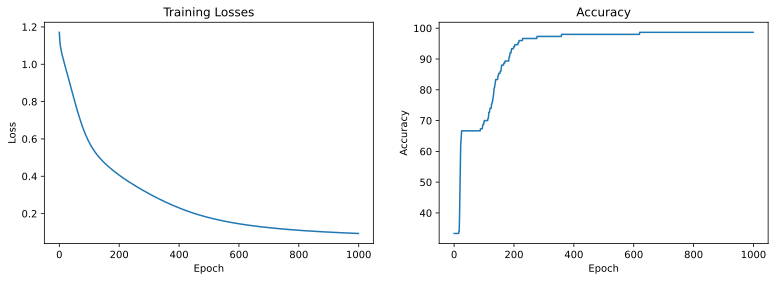

In [9]:
# Report the final accuracy of the custom ANN model.
print('Final accuracy of the custom ANN model: %g%%' % custom_total_accuracy)

# Create subplots for losses and accuracy.
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

# Plot training losses.
ax[0].plot(custom_losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Training Losses')

# Plot ongoing accuracy during training.
ax[1].plot(custom_ongoing_accuracy)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy')
plt.show()


In [10]:
# Confirm that all model predictions sum to 1 when converted to softmax.
custom_softmax = nn.Softmax(1)
torch.sum(custom_softmax(custom_predictions), axis=1)


tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

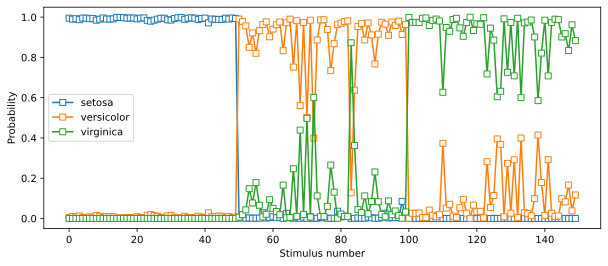

In [11]:
# Plot the raw model outputs.
fig = plt.figure(figsize=(10, 4))
plt.plot(custom_softmax(custom_predictions).detach(), 's-', markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()
